# The Human Eye

In [302]:
import math

def optimalDistance(width, resolution, maxDistance):
  pixelLength = width / resolution
  distance = (60 * pixelLength) / (math.tan(0.5 * math.pi / 180))
  distance = distance / 12
  if (distance <= maxDistance):
    print("Place your TV at a distance of", round(distance, 2), "feet from the TV.\n")
  else:
    print("Oh no! Your room is too small!\n")
  

width = float(input("Enter the width of the TV (in inches): "))
resolution = int(input("Enter the resolution of the TV: "))
maxDistance = float(input("Enter the available distance (in feet): "))

optimalDistance(width, resolution, maxDistance)


Enter the width of the TV (in inches): 40
Enter the resolution of the TV: 1920
Enter the available distance (in feet): 100
Place your TV at a distance of 11.94 feet from the TV.



# Grayscale Images

In [303]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.rcParams['image.cmap'] = 'gray'

ariel = '5.1.10.tiff'
airplane = '5.1.11.tiff'
APC = '7.1.08.tiff'

In [304]:
def readAndDisplay(fileName):
  I = mpimg.imread(fileName)
  imgplot = plt.imshow(I)
  return I

In [305]:
def findResolution(I, filePath):
  max = np.max(I)
  min = np.min(I)
  print("Max:", max, " Min:", min)
  bpp = int(np.ceil(np.log2(max)))
  print("Bits per pixel:", bpp)
  height, width = I.shape
  print("Resolution:", height, "x", width)

  # size of compressed image
  size_compressed = round(os.path.getsize(filePath) / 1024, 2) # in kB
  size_uncompressed = (width * height) / 1024 # in kB
  print("Downloaded size:", size_compressed, "Uncompressed size:", size_uncompressed)

  efficiency = 100 * (size_uncompressed - size_compressed) / size_compressed
  print("Efficieny:", round(efficiency, 2))

In [306]:
def bitPlane(I, b):
  binaryI = (I >> b) & 1
  bitplane = plt.imshow(binaryI)

Max: 248  Min: 1
Bits per pixel: 8
Resolution: 256 x 256
Downloaded size: 64.13 Uncompressed size: 64.0
Efficieny: -0.2


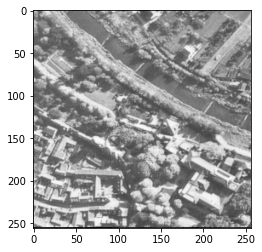

In [307]:
I = readAndDisplay(ariel)
findResolution(I, ariel)

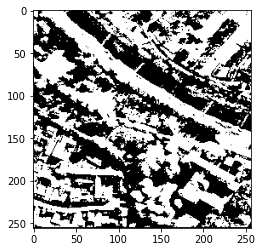

In [308]:
test = bitPlane(I, 7)

Max: 232  Min: 0
Bits per pixel: 8
Resolution: 256 x 256
Downloaded size: 64.13 Uncompressed size: 64.0
Efficieny: -0.2


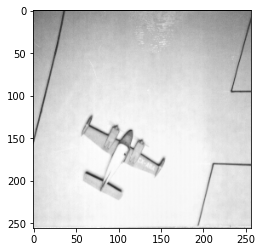

In [309]:
I = readAndDisplay(airplane)
findResolution(I, airplane)

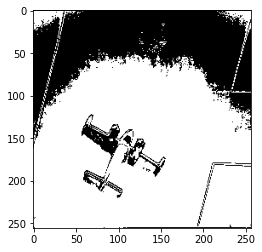

In [310]:
test = bitPlane(I, 6)

Max: 215  Min: 12
Bits per pixel: 8
Resolution: 512 x 512
Downloaded size: 256.13 Uncompressed size: 256.0
Efficieny: -0.05


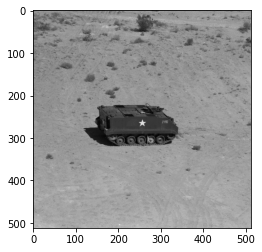

In [311]:
I = readAndDisplay(APC)
findResolution(I, APC)

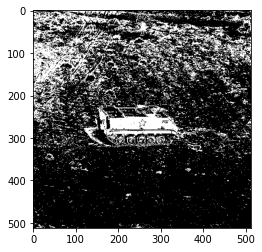

In [312]:
test = bitPlane(I, 5)

# Binary Image Processing

In [313]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.rcParams['image.cmap'] = 'gray'

airplane = '5.1.11.tiff'
truck = '7.1.01.tiff'
airport = '5.3.02.tiff'
APC = '7.1.08.tiff'

## 1.

In [314]:
def computeHistogram(filePath):
  I = mpimg.imread(filePath)
  frequencies = np.zeros(256)

  for i in range(256):
    frequencies[i] = np.count_nonzero(I == i)
  
  x_axis = np.arange(256)
  ax = plt.bar(x_axis, frequencies)
  plt.show(ax)

  return frequencies


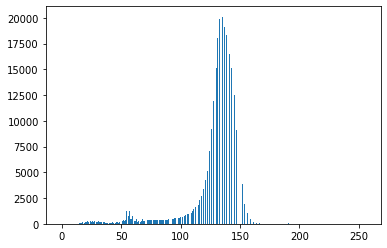

Modality: 1


In [315]:
APC_hist = computeHistogram(APC)
print("Modality: 1")

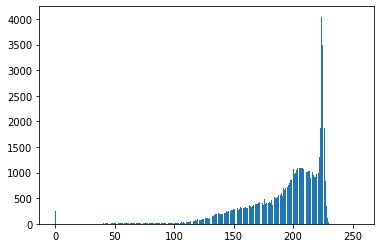

Modality: 2


In [316]:
airplane_hist = computeHistogram(airplane)
print("Modality: 2")

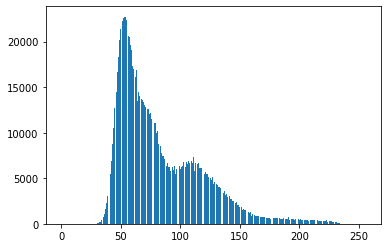

Modality: 2


In [317]:
airport_hist = computeHistogram(airport)
print("Modality: 2")

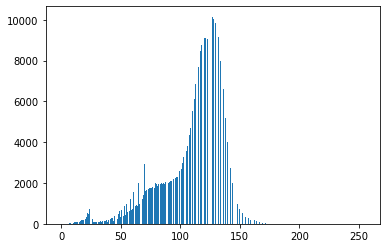

Modality: 1


In [318]:
truck_hist = computeHistogram(truck)
print("Modality: 1")

## 2.

In [319]:
def binarise(filePath, T):
  I = mpimg.imread(filePath)
  binI = (I >= T)
  plt.imshow(binI)

  return binI

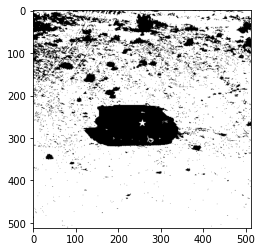

In [320]:
binAPC = binarise(APC, 120)

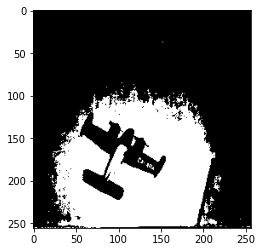

In [321]:
binAirplane = binarise(airplane, 215)

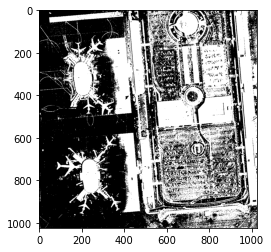

In [322]:
binAirport = binarise(airport, 75)

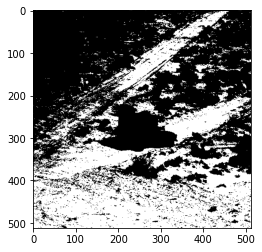

In [323]:
binTruck = binarise(truck, 120)

NOTE: The thresholds were chosen by observing the histograms drawn in the previous part.

## 3. (a)

In [324]:
def intraClassOtsu(frequencies, filePath):
  I = mpimg.imread(filePath)
  X, Y = I.shape
  print(X, Y)
  
  min = float('inf')
  T = 0
  x = np.arange(256)

  for i in range(1, 256):
    # zero = frequencies[0 : i]
    # x0 = x[0 : i]
    one = frequencies[i:]
    # x1 = x[i:]

    q1 = np.sum(one) / (X * Y)
    q0 = 1 - q1

    if q0 == 0:
      var = q1 * np.var(I[I >= i])
    elif q1 == 0:
      var = q0 * np.var(I[I < i])
    else:
      var = q0 * np.var(I[I < i]) + q1 * np.var(I[I >= i])


    if var < min:
      min = var
      T = i

  return T

512 512
100


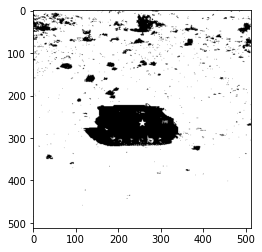

In [325]:
minT = intraClassOtsu(APC_hist, APC)
print(minT)
binAPC = binarise(APC, minT)

256 256
179


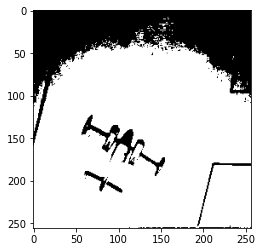

In [326]:
minT = intraClassOtsu(airplane_hist, airplane)
print(minT)
binAirplane = binarise(airplane, minT)

1024 1024
96


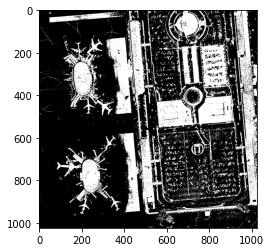

In [327]:
minT = intraClassOtsu(airport_hist, airport)
print(minT)
binAirport = binarise(airport, minT)

512 512
97


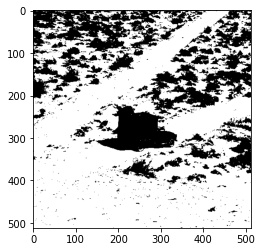

In [328]:
minT = intraClassOtsu(truck_hist, truck)
print(minT)
binTruck = binarise(truck, minT)

## 3. (b)

In [334]:
def interClassOtsu(frequencies, filePath):
  I = mpimg.imread(filePath)
  X, Y = I.shape
  print(X, Y)

  
  max = -float('inf')
  T = 0
  x = np.arange(256)

  p = np.divide(frequencies, X * Y)
  
  avg = np.mean(I)

  sum = 0
  P = np.zeros(256)
  avg0 = np.zeros(256)
  avg1 = np.zeros(256)

  P[0] = p[0]
  for i in range(1, 256):
    P[i] = P[i - 1] + p[i]

  var = 0
  for t in range(0, 255):
    if P[t + 1] != 0 and P[t + 1] != 1:
      # P[t + 1] = P[t] + p[t + 1]
      avg0[t + 1] = ((avg0[t] * P[t]) + (t + 1) * p[t + 1])/P[t + 1]
      avg1[t + 1] = (avg - avg0[t + 1] * P[t + 1])/(1 - P[t + 1])

      var = P[t + 1] * (1 - P[t + 1]) * ((avg0[t + 1] - avg1[t + 1]) ** 2)
      
      if var > max:
        max = var
        T = t
  return T

512 512
98


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

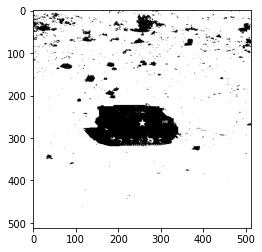

In [335]:
minT = interClassOtsu(APC_hist, APC)
print(minT)
binarise(APC, minT)

## 4.

In [331]:
def connectedComponents(I):
  print(I.shape)
  R = np.zeros(I.shape)
  k = 1

  top = 0
  left = 0
  background = 1

  blobSizes = {}

  for i in range(I.shape[0]):
    for j in range(I.shape[1]):

      if i - 1 < 0 and j - 1 < 0:
        top = background
        left = background
      elif i - 1 < 0:
        top = background
        left = I[i, j - 1]
      elif j - 1 < 0:
        top = I[i - 1, j]
        left = background
      else:
        top = I[i - 1, j]
        left = I[i, j - 1]

      if I[i, j] == 0:
        if left == 1 and top == 1:
          R[i, j] = k
          k = k + 1
          blobSizes[R[i, j]] = 1
        elif left == 1 and top == 0:
          R[i, j] = R[i - 1, j]
          blobSizes[R[i, j]] += 1
        elif left == 0 and top == 1:
          R[i, j] = R[i, j - 1]
          blobSizes[R[i, j]] += 1
        elif left == 0 and top == 0:
          R[i, j] = min(R[i, j - 1], R[i - 1, j])
          blobSizes[R[i, j]] += 1

          R[R == max(R[i, j - 1], R[i - 1, j])] = min(R[i, j - 1], R[i - 1, j])


  
  # blobs = (R > 0)
  blobs = (R <= 0)
  # plt.imshow(R)

  biggestBlob = max(blobSizes, key=blobSizes.get)
  clean = R == biggestBlob

  return R, clean

blobs, cleanBlob = connectedComponents(binAPC)

(512, 512)


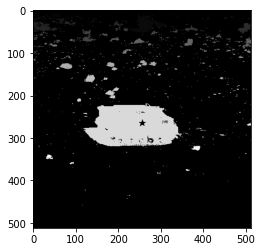

In [332]:
plt.imshow(blobs)

## 5.

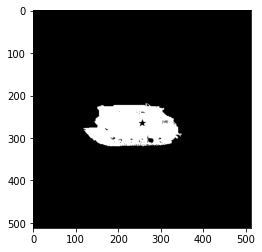

In [333]:
plt.imshow(cleanBlob)